In [2]:
import numpy as np
import nbimporter
import pandas as pd
import matplotlib.pyplot as plt
from DataParserforCNN import read_class
import cv2

%matplotlib inline

Importing Jupyter notebook from DataParserforCNN.ipynb


Using TensorFlow backend.


In [14]:
class_array = read_class()
base_path = '/Volumes/JS/QuickDraw/train_simplified/'
airplane = pd.read_csv(base_path + 'airplane.csv', nrows=1000)

In [36]:
color_list = [(148,0,211), (112,0,171), (75,0,130), (38,0,193), (0,0,255),
              (0,128,128), (0,255,0), (128,255,0), (255,255,0), (255,191,0),
              (255,127,0), (255,191,0), (255,0,0)]

In [45]:
color_list[13]

IndexError: list index out of range

In [46]:
def drawing_to_image(drawing, H, W):

    point=[]
    time =[]
    
#     coordinates = []
    
    for t,(x,y) in enumerate(drawing):
        point.append(np.array((x,y),np.float32).T)
        time.append(np.full(len(x),t))

    point = np.concatenate(point).astype(np.float32)
    time  = np.concatenate(time).astype(np.int32)

    image  = np.full((H,W,3),0,np.uint8)
    x_max = point[:,0].max()
    x_min = point[:,0].min()
    y_max = point[:,1].max()
    y_min = point[:,1].min()
    w = x_max-x_min
    h = y_max-y_min
    #print(w,h)

    s = max(w,h)
    norm_point = (point-[x_min,y_min])/s
    norm_point = (norm_point-[w/s*0.5,h/s*0.5])*max(W,H)*0.85
    norm_point = np.floor(norm_point + [W/2,H/2]).astype(np.int32)

    T = time.max()+1
    for t in range(T):
        print(t)
        if t < len(color_list):
            cur_color = color_list[t]
        else:
            cur_color = color_list[-1]
        p = norm_point[time==t]
        x,y = p.T
        image[y,x]=255
        N = len(p)
        for i in range(N-1):
            x0,y0 = p[i]
            x1,y1 = p[i+1]
            cv2.line(image,(x0,y0),(x1,y1),cur_color,1,cv2.LINE_AA)

    return image

In [47]:
drawings = airplane['drawing'][40]
drawings = eval(drawings)
imgs = drawing_to_image(drawings, 64, 64)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


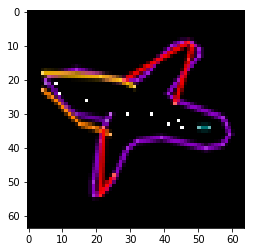

In [51]:
imgs= imgs / 255.
plt.imshow(imgs.astype('float'))

In [50]:
print(drawings)

[[[91, 83, 77, 70, 71, 82, 97, 116, 128, 161, 224, 248, 255, 252, 246, 183, 173, 185, 213, 212, 204, 192, 175, 158, 143, 131, 103, 44, 6, 2], [103, 118, 140, 195, 215, 207, 190, 149, 137, 134, 146, 142, 127, 113, 105, 81, 73, 53, 23, 10, 1, 1, 9, 24, 45, 52, 53, 40, 50, 55]], [[86, 45, 31, 6, 1], [111, 102, 93, 61, 60]], [[173, 173], [117, 117]], [[148, 148], [103, 102]], [[193, 193], [120, 120]], [[227, 216], [120, 122]], [[187, 186], [109, 109]], [[116, 114], [103, 103]], [[60, 59], [83, 83]], [[21, 21], [71, 71]], [[92, 69, 52, 31, 12, 0], [127, 122, 115, 98, 76, 66]], [[124, 105, 80, 0], [62, 54, 50, 47]], [[19, 17], [61, 57]], [[113, 201, 203, 201, 183], [55, 2, 6, 24, 85]], [[82, 78, 97], [119, 213, 186]]]
